In [1]:
from reader import *
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import os
from scipy import misc

from cfgs.config import cfg

In [11]:
img_id = 262145
img_path = os.path.join(cfg.train_images_dir, '%012d.jpg' % img_id)
mask_miss_path = os.path.join(cfg.train_masks_dir, "mask_miss_%012d.png" % img_id)
mask_all_path = os.path.join(cfg.train_masks_dir, "mask_all_%012d.png" % img_id)

In [17]:
img = misc.imread(img_path)
mask_miss = misc.imread(mask_miss_path, 0)
mask_all = misc.imread(mask_all_path, 0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


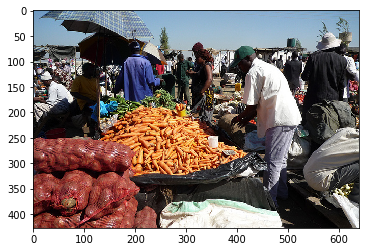

In [18]:
plt.imshow(img)

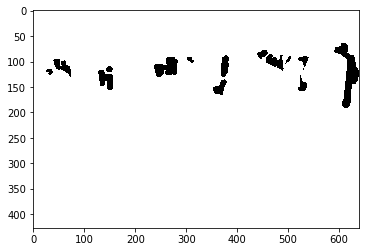

In [19]:
plt.imshow(mask_miss, cmap='gray')

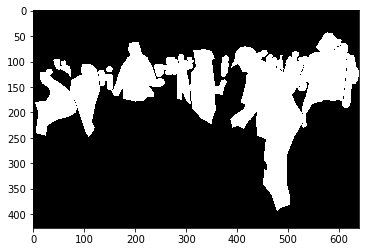

In [20]:
plt.imshow(mask_all, cmap='gray')

In [2]:
ds = Data('train', False)

loading annotations into memory...
Done (t=6.82s)
creating index...
index created!


In [3]:
ds.size()

53044

In [4]:
ds.reset_state()

In [5]:
g = ds.get_data()

In [6]:
dp = next(g)

In [7]:
len(dp)

5

In [9]:
img_id, img, heatmap, paf, mask = dp

In [10]:
img.shape

(368, 368, 3)

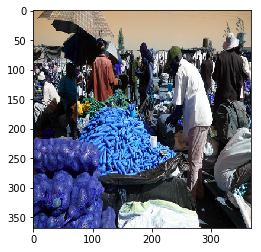

In [11]:
plt.imshow(img)

In [12]:
heatmap.shape

(46, 46, 19)

In [25]:
heatmap_in_one = np.sum(heatmap[:,:,0:18], axis=2)

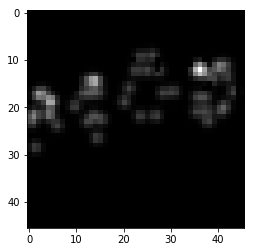

In [26]:
plt.imshow(heatmap_in_one, cmap='gray')

In [23]:
heatmap[:,:,-1]

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [40]:
mask.shape

(46, 46, 1)

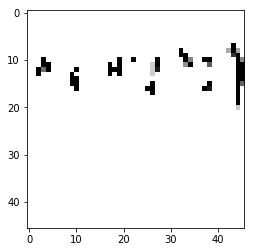

In [28]:
plt.imshow(mask, cmap='gray')

In [29]:
np.min(heatmap)

0.0

In [30]:
paf.shape

(46, 46, 38)

In [31]:
np.max(paf)

1.0